Усі імпорти рекомендую розташувати отут зверху для зручності.

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

1.Завантажте дані у pandas dataframe з файла `ecommerce_data.csv`. Обовʼязково при завантаженні вкажіть параметр `encoding = 'ISO-8859-1'`, без нього буде помилка.

In [34]:
df = pd.read_csv('/content/ecommerce_data_1.csv', encoding='ISO-8859-1')

2.Виведіть перші три записи в завантаженому наборі даних

In [35]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


3.Перейменуйте колонки, для цього просто запустіть код нижче та зверніть увагу, як ми перейменували колонки. Перейменування тут - просто для зручності.

In [36]:
df.columns = df.columns.str.lower()

4.Виведіть поточні назви колонок.

In [37]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

# Базове розуміння даних

5.Виведіть кількість колонок і стовпців в наборі даних.

In [38]:
df.shape

(541909, 8)

6.Виведіть типи даних в кожній з колонок. Будь-яким способом, але аби для Вас як для дослідника стало зрозуміло, з якими даними ми зараз маємо справу.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    541909 non-null  object 
 1   stockcode    541909 non-null  object 
 2   description  540455 non-null  object 
 3   quantity     541909 non-null  int64  
 4   invoicedate  541909 non-null  object 
 5   unitprice    541909 non-null  float64
 6   customerid   406829 non-null  float64
 7   country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Очікуваний результат (один з):

![](https://drive.google.com/uc?export=view&id=1Pc2cam8vdZeEP4xLXlsoevOTt4O_KI4R)

7.Виведіть кількість пустих (null) значень в кожній з колонок за спаданням цієї кількості.

In [40]:
null_counts = df.isnull().sum().sort_values(ascending=False)
null_counts

,0
customerid,135080
description,1454
stockcode,0
invoiceno,0
quantity,0
invoicedate,0
unitprice,0
country,0


Очікуваний результат:

In [41]:
null_count = df.isnull().sum()
null_count = null_count[null_count > 0].sort_values(ascending=False)
null_count

,0
customerid,135080
description,1454


![](https://drive.google.com/uc?export=view&id=1IXVowBSH9-LtCR8gkMXcQHXWPinujkF5)

### Конвертація дат

8.Конвертуйте дату колонки `invoicedate` у тип `datetime64[ns]`.

In [42]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

In [43]:
print(df['invoicedate'].dtype)

datetime64[ns]


Запустіть код нижче:

In [44]:
df.invoicedate[:2]

,invoicedate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1ds5CwdM5D50hlnk1zsDw7YT-aG_KErIg)

# Чистка даних

### Прибираємо пусті значення (NA)

9.Приберіть усі пусті значення з набору даних `df` і запишіть результат у нову змінну `df_new`.

In [45]:
df_new = df.dropna()

In [46]:
print(f"Було: {len(df)}, стало: {len(df_new)}")

Було: 541909, стало: 406829


10.Виведіть кількість колонок і рядків в `df_new`.

In [47]:
df_new.shape

(406829, 8)

11.Виведіть, який відсоток (від 0 до 100%) рядків ми видалили з `df`, коли прибрали пусті значення? Округліть результат до цілих відсотків.

In [48]:
rows_before = len(df)
rows_after = len(df_new)

percent_dropped = round((rows_before - rows_after) / rows_before * 100)
print(f"Видалено {percent_dropped}% рядків.")

Видалено 25% рядків.


Очікуваний результат: `25%`

### Приберемо негативні значення `quantity`

12.Виведіть мінімальне, максимальне і середнє значення колонки `quantity`. Найкраще згадати, як це зробити одною командою, що дозволяє "описати" колонки в датафреймі :)

In [49]:
df_new['quantity'].describe()

,quantity
count,406829.000000
mean,12.061303
std,248.693370
min,-80995.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,80995.000000


13.Скажімо, нас не цікавлять записи з негативними quantity (бо це поверненння).   
Приберіть всі рядки, де `quantity` менше 0 з набора даних `df_new` і запишіть в той самий набір даних `df_new`.

In [50]:
df_new = df_new[df_new['quantity'] >= 0]

In [51]:
df_new['quantity'].describe()

,quantity
count,397924.000000
mean,13.021823
std,180.420210
min,1.000000
25%,2.000000
50%,6.000000
75%,12.000000
max,80995.000000


# Обробка даних

### Зміна типу даних `custid`

14.Ідентифікатор клієнта має мати тип "рядок" для простоти роботи з цією колонкою. Бо інакше пандас буде інтерпретувати цю колонку як число - а це логічно не правильно.
Перетворіть тип даних колонки `custid`  спочатку на int, а потім на рядок. Або можете зробити ці перетворення в одній функції (лямбді).

In [55]:
df_new['customerid'] = df_new['customerid'].apply(lambda x: str(int(x)))

Запустіть код нижче:

In [57]:
df_new['customerid'][:3]

,customerid
0,17850
1,17850
2,17850


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1V5Mn0OC6hD-OmXGswe2N8CsIxsuBuoPE)

### Додамо колонку `amountspent`

15.Додайте в `df_new` колонку `amountspent`, яка є добутком колонок `quantity` і `unitprice`.

In [58]:
df_new['amountspent'] = df_new.quantity * df_new.unitprice
df_new.amountspent

,amountspent
0,15.30
1,20.34
2,22.00
3,20.34
4,20.34
...,...
541904,10.20
541905,12.60
541906,16.60
541907,16.60


### Додавання колонок `month`, `day`, `hour`, `yearmonth` для інвойса.

16.Використовуючи колонку invoicedate та те, що вона в нас вже має тип datetime, створіть 4 нових колонки в даних:
- `yearmonth` - рік і місяць інвойсу разом у форматі "2010-12" - тобто 12 місяць 2010го року і тип цієї колонки має бути датою (підказка: просто робимо для колонки`invoicedate` `dt.to_period('M')` для того аби таке отримати)
- `month` - місяць інвойсу
- `day` - день тижня інвойсу (понеділок - це перший, неділя - останній)
- `hour` - година інвойсу

Зробіть також так, аби `yearmonth` була третьою (за рахунком) колонкою в датафреймі, `month` - четвертою, `day` - пʼятою, `hour` - шостою.

In [74]:
df_new['yearmonth'] = df_new.invoicedate.dt.to_period('M')
df_new['month'] = df_new['invoicedate'].dt.month
df_new['day'] = df_new['invoicedate'].dt.dayofweek + 1  # Понеділок = 1, неділя = 7
df_new['hour'] = df_new['invoicedate'].dt.hour

In [75]:
cols = df_new.columns.tolist()

# Додаємо нові колонки в потрібному порядку: yearmonth (3), month (4), day (5), hour (6)
cols.insert(2, cols.pop(cols.index('yearmonth')))
cols.insert(3, cols.pop(cols.index('month')))
cols.insert(4, cols.pop(cols.index('day')))
cols.insert(5, cols.pop(cols.index('hour')))

df_new = df_new[cols]

Запустіть код нижче:

In [76]:
df_new.head(3)

,invoiceno,stockcode,yearmonth,month,day,hour,description,quantity,invoicedate,unitprice,customerid,country,amountspent
0,536365,85123A,2010-12,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,2010-12,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,2010-12,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [77]:
df_new.dtypes

,0
invoiceno,object
stockcode,object
yearmonth,period[M]
month,int32
day,int32
hour,int32
description,object
quantity,int64
invoicedate,datetime64[ns]
unitprice,float64


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1Wn4tNmFOvqHk0VLpfwASKWiPpjJ5_Jgt)

![](https://drive.google.com/uc?export=view&id=1fYm7_uYhk14J51YkqJLtsQo_aqxz6jGZ)

# Базовий Exploratory Data Analysis (EDA)

17.Побудуйте з допомогою методів візуалізації `pandas` датафрейму (ті що з категорії `df.plot()`) стовпчастий графік кількості унікальних продажів помісячно за весь наявний період в даних. Зробіть так, аби підписи дат були нахилені під кутом 45 градусів для зручнішого перегляду.
Кількість унікальних продажів - це кількість унікальних інвойсів.

Підказка: для візуалізації нам спочатку треба агреугувати дані помісячно.

In [81]:
monthly_sales = df_new.groupby('yearmonth')['invoiceno'].nunique()

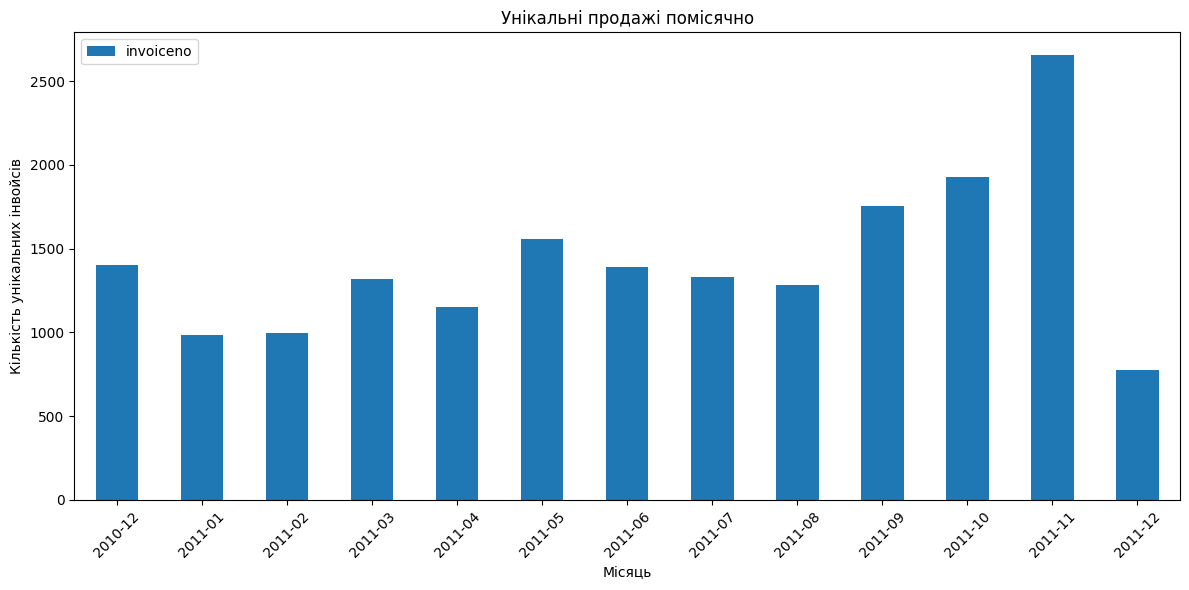

In [79]:
monthly_sales.plot.bar(figsize=(12, 6))

plt.title('Унікальні продажі помісячно')
plt.xlabel('Місяць')
plt.ylabel('Кількість унікальних інвойсів')
plt.xticks(rotation=45)
plt.legend(["invoiceno"])

plt.tight_layout()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1xbjqTCroVKLgdRxFGA9LG1T6Xx9eWlO1)

18.Побудуйте стовпчастий графік кількості унікальних інвойсів для топ 10 клієнтів за цим показником.

In [91]:
top_clients = df_new.groupby("customerid")["invoiceno"].nunique().nlargest(10)
top_clients.head(10)

,invoiceno
customerid,
12748,210
14911,201
17841,124
13089,97
14606,93
15311,91
12971,86
14646,74
16029,63


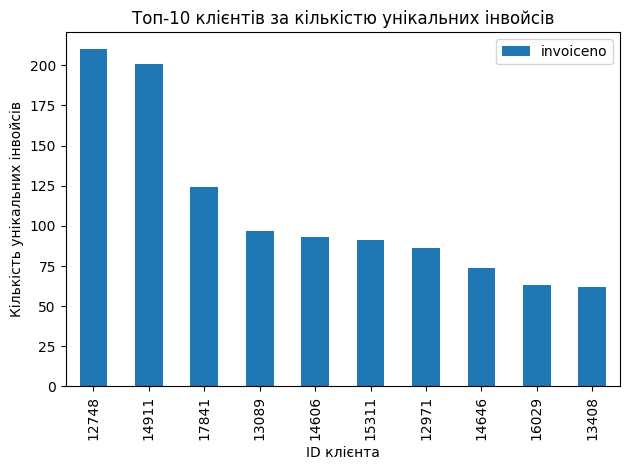

In [93]:
top_clients.plot.bar()

plt.title('Топ-10 клієнтів за кількістю унікальних інвойсів')
plt.xlabel('ID клієнта')
plt.ylabel('Кількість унікальних інвойсів')
plt.legend(["invoiceno"])

plt.tight_layout()
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1zGhcVaPZBqcKj8YG_P-0pOzGVAV8cJNr)

19.Створіть новий датафрейм, що містить сумарний `amountspent` по кожному ідентифікатору клієнта.

In [95]:
client_spent = df_new.groupby('customerid')['amountspent'].sum().reset_index()

20.Використовуючи датафрейм з попереднього пункту, виведіть, якими є 10, 25, 50, 75 і 90 персентилі сумарних витрат клієнтів за розглянутий період:

In [97]:
client_spent.describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90])

,amountspent
count,4339.000000
mean,2053.793018
std,8988.248381
min,0.000000
10%,156.566000
25%,307.245000
50%,674.450000
75%,1661.640000
90%,3646.164000
max,280206.020000


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16h2lsEwR3GooNkzH0JLfJHRk5oyG3ZqE)

21.Скільки унікальних клієнтів мають сумарні витрати вищі, ніж 90-тий персентиль в попередньому завдані?

In [101]:
threshold = percentiles.loc[0.90]
num_clients_above_90 = (client_spent['amountspent'] > threshold).sum()

print(f"Кількість клієнтів з витратами вище 90-го персентиля: {num_clients_above_90}")

Кількість клієнтів з витратами вище 90-го персентиля: 434


22.Виведіть середню суму покупок в мережі по дням тижня. Дні тижня мають йти в звичному порядку Monday, Tuesday і т.д.

In [103]:
day_map = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday"
    }

In [104]:
amountspent_day = df_new.groupby("day")["amountspent"].mean()
amountspent_day.index = amountspent_day.index.map(day_map)
amountspent_day

,amountspent
day,
Monday,21.065755
Tuesday,25.582686
Wednesday,23.056790
Thursday,24.694687
Friday,27.098468
Sunday,12.624679


## Дослідимо продажі на суму 0 умовних одиниць

23.Можна було помітити вище, що в нас є продажі на суму 0. Дослідимо їх. Створіть новий датафрейм з тільки такими продажами.

In [107]:
zero_sales_df = df_new[df_new['amountspent'] == 0].copy()

### Динаміка продажів на суму 0

24.Зобразіть у вигляді стовпчастої діаграми помісячну динаміку продажів на суму 0.

In [108]:
monthly_zero_sales = zero_sales_df.groupby('yearmonth').size()

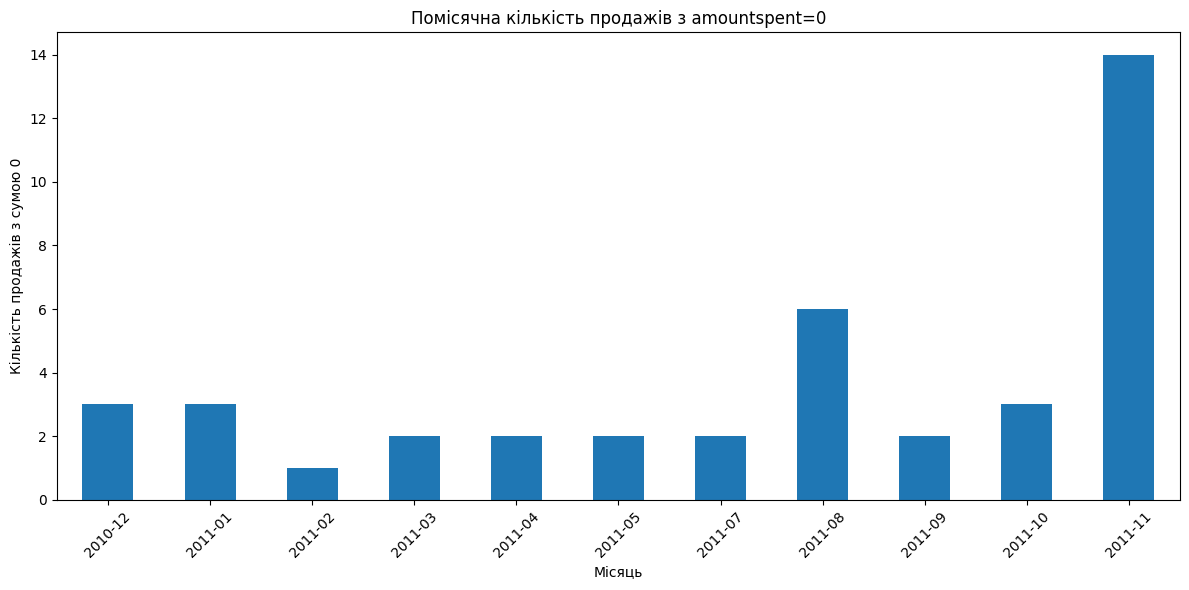

In [109]:
monthly_zero_sales.plot.bar(figsize=(12,6))

plt.title('Помісячна кількість продажів з amountspent=0')
plt.xlabel('Місяць')
plt.ylabel('Кількість продажів з сумою 0')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RfpdWGqkOmwZ6RVUqQz-U-q3qkml5g88)

25.Згрупуйте дані за країнами та підрахуйте кількість унікальних інвойсів з сумою 0 для кожної країни. Виведіть у вигляді датафрейму.

In [117]:
zero_sales_df.groupby("country")["invoiceno"].nunique().reset_index().sort_values(by="invoiceno", ascending=False)


,country,invoiceno
9,United Kingdom,21
0,Australia,3
1,EIRE,2
3,Germany,2
4,Netherlands,1
2,France,1
5,Norway,1
6,RSA,1
7,Spain,1
8,Switzerland,1


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1N9rcWby_Umc31Q7e-1p2bCb1nCpzadoz)

Велике питання, чого магазин так багато порівняно роздавав безкоштовних товарів в UK, але така політика фірми :)